### Support Vector Machines Example 1.4
The **svm** package from **sklearn** contains implementations for a number of statistical learning methods. In particular, a maximal margin classifier can be fit using the function **svm()**.  

Here we demonstrate the use of this function on a simple two-dimensional example. We begin by generating the observations.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm
from SVM_def import SVM_def

# SVM_def is a class containing definitions used throughout this Chapter
svm_def = SVM_def()

# Create data
n = 10
np.random.seed(3)
# x from normal distribution, # y is n elements -1 and n elements 1
x = np.random.normal(loc = 2, scale = 1.0, size = (2*n, 2)) 
y = np.concatenate((-1 * np.ones(n), np.ones(n))) 

x[y==1,0] -= 3  # offset x[:][0] for y is 1
x[y==1,1] += 3  # offset x[:][1] for y is 1

# create grid to evaluate model
xy, xx, yy = svm_def.create_grid(x, 10) 

Next, we fit the maximal margin hyperplane. 

In [2]:
# Fit model
cost = 10
clf = svm.SVC(kernel='linear', C=cost)
clf.fit(x, y)
# Decision function in grid:
Z = clf.decision_function(xy).reshape(xx.shape)

We can now plot the support vector classifier obtained:

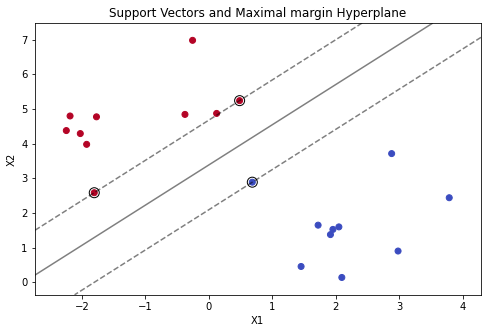

In [3]:
# create grid to evaluate model
xy, xx, yy = svm_def.create_grid(x, 10) 

# Create scatter plot data
fig = plt.figure(figsize=[8, 5])
ax = fig.add_subplot(1, 1, 1)
svm_def.svm_plot(ax, x, y, Z, clf)
plt.title("Support Vectors and Maximal margin Hyperplane")
plt.show()

The region of the feature space that will be assigned to the $+1$ class is shown in red, and the region that will be assigned to the $-1$ class is shown in  blue. The decision boundary between the two classes is linear. The support vectors are plotted with an extra circle: we see here that there are three support vectors. 

We can determine the identity and location of the support vectors as follows:

In [6]:
# Inidices and Coordinates of the Support Vectors:
print("Support Indices: ", clf.support_, "\nCoordinates:\n", clf.support_vectors_,)

Support Indices:  [ 5 11 17] 
Coordinates:
 [[ 0.68613525  2.88462238]
 [ 0.48614836  5.23671627]
 [-1.80376609  2.58091683]]


The coefficients of the linear decision boundary can be obtained using the attributes **.coef\_** and **.intercept\_**:

In [9]:
# Coefficients
print("Coefficients:\n", clf.coef_, "\nIntercept:\n", clf.intercept_)

Coefficients:
 [[-0.89724444  0.77363233]] 
Intercept:
 [-2.61540156]


From this output we read $\beta_0=-2.61540156$, $\beta_1=-0.89724444$, and $\beta_2=0.77363233$. In other words, the separating hyperplane is

$
-2.61540156-0.89724444X_1+0.77363233X_2=0
$

Unfortunately, the **svm.SVC()** function does not explicitly output the the width of the margin.
